
# Code

#### If the imports fail, run the install_packages notebook

In [1]:
#visualization
import matplotlib.pyplot as plt

#arrays
import numpy as np

#file system
import os
import platform

#CSV read
import pandas as pd

#model building
import pymc3 as pm
print(pm.__version__)
import theano
import theano.tensor as tt
from theano.compile.ops import as_op

np.random.seed(123)

3.8


In [2]:
if platform.system() == 'Windows':  # check the file system formatting
    filtered_filename = os.getcwd() + '\..\data\\filtered_data_csv.csv'
else:
    filtered_filename = os.getcwd() + '/../data//filtered_data_csv.csv'
    #!MKL_THREADING_LAYER=GNU
    
tumor_size_db = pd.read_csv(filtered_filename)
#tumor_size_db.head()

In [3]:
ts = np.array(tumor_size_db['Day']).transpose() # dimension: (19,)
Ts = np.array(tumor_size_db[['G1_avg','G2_avg','G3_avg','G4_avg','G5_avg','G6_avg']]).transpose() # indexing: group, time
sigmas = np.array(tumor_size_db[['G1_sd','G2_sd','G3_sd','G4_sd','G5_sd','G6_sd']]).transpose()

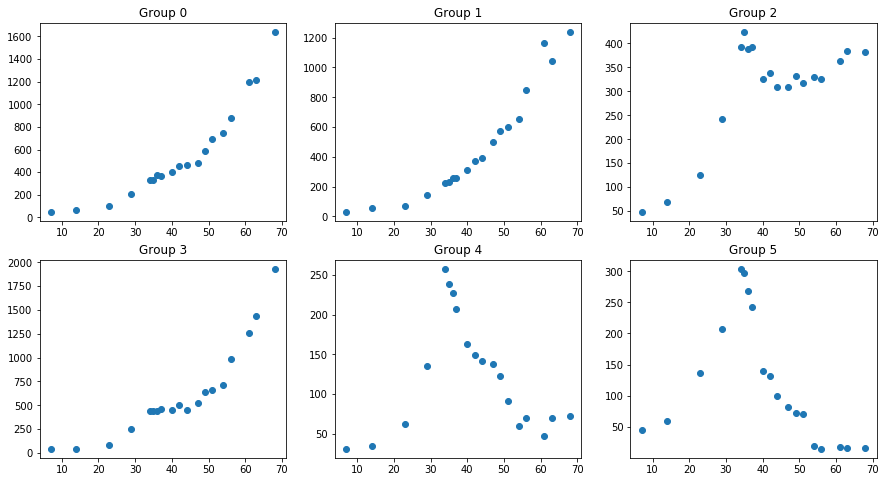

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(15,8))
for group in range(6):
    axs[int(group/3), int(group%3)].title.set_text('Group ' + str(group))
    axs[int(group/3), int(group%3)].scatter(ts, Ts[group])
plt.show()

## Treatment model - Impulse

In [5]:
def get_tt(tuple_treatment_group):
    switcher={
        ('dox',1): [39],
        
        ('her',2): [35,38],
        
        ('dox',3): [35],
        ('her',3): [36,39],
        
        ('her',4): [35,38],
        ('dox',4): [39],
        
        ('her',5): [35,38],
        ('dox',5): [35,38]
    }  
    return switcher.get(tuple_treatment_group, [])

def get_Sd_impulse(ts):
    Sds = np.zeros((6, len(ts)))
    for group in range(6):
        treatment_times = get_tt(('dox', group))
        for tt in treatment_times:
            ii = np.where(ts > tt)[0][0]
            Sds[group, ii] = 1
    return Sds
    
def get_Sh_impulse(ts):
    Shs = np.zeros((6, len(ts)))
    for group in range(6):
        treatment_times = get_tt(('her', group))
        for tt in treatment_times:
            ii = np.where(ts > tt)[0][0]
            Shs[group, ii] = 1
    return Shs

def get_Sd_impulse_by_group(ts, group):
    Sds = np.zeros((1, len(ts)))
    treatment_times = get_tt(('dox', group))
    for tt in treatment_times:
        ii = np.where(ts > tt)[0][0]
        Sds[0, ii] = 1
    return Sds
    
def get_Sh_impulse_by_group(ts, group):
    Shs = np.zeros((1, len(ts)))
    treatment_times = get_tt(('her', group))
    for tt in treatment_times:
        ii = np.where(ts > tt)[0][0]
        Shs[0, ii] = 1
    return Shs

def get_Sd_impulse_Combination(ts, group_idxs):
    Sds = np.zeros((len(group_idxs), len(ts)))
    for ii in range(len(group_idxs)):
        group_idx = group_idxs[ii]
        treatment_times = get_tt(('dox', group_idx))
        for tt in treatment_times:
            jj = np.where(ts > tt)[0][0]
            Sds[ii, jj] = 1
    return Sds

def get_Sh_impulse_Combination(ts, group_idxs):
    Shs = np.zeros((len(group_idxs), len(ts)))
    for ii in range(len(group_idxs)):
        group_idx = group_idxs[ii]
        treatment_times = get_tt(('her', group_idx))
        for tt in treatment_times:
            jj = np.where(ts > tt)[0][0]
            Shs[ii, jj] = 1
    return Shs

### Treatment calculation unit tests

teatment impulse


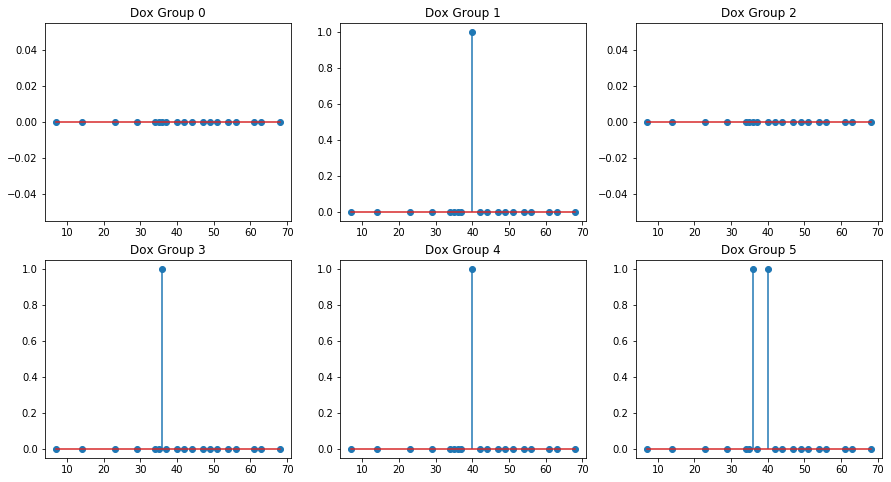

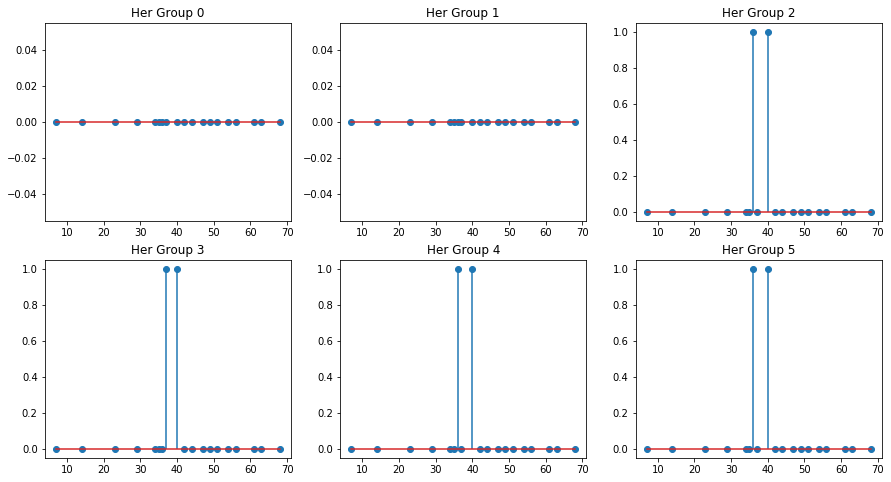

treatment impulse by group


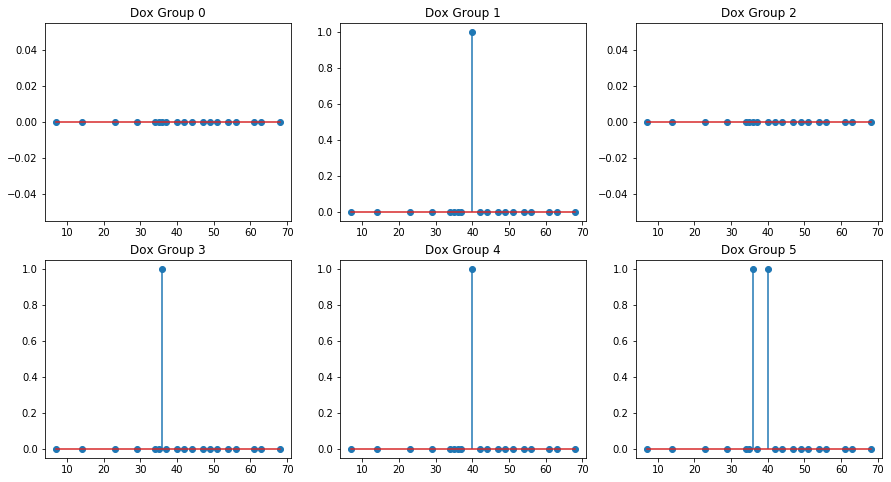

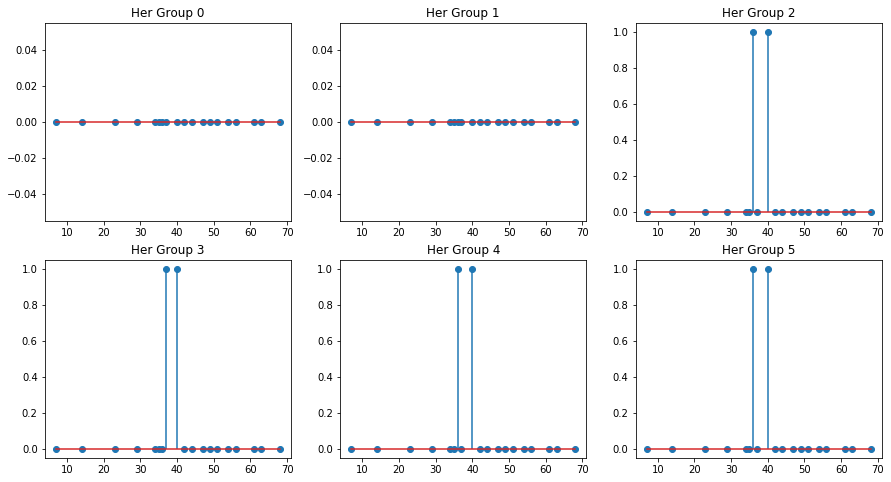

In [6]:
def test_treatment_Sd_impulse():
    tau_d=0.1
    Sds = get_Sd_impulse(ts)
    fig, axs = plt.subplots(2, 3, figsize=(15,8))
    for group in range(6):
        axs[int(group/3), int(group%3)].title.set_text('Dox Group ' + str(group))
        axs[int(group/3), int(group%3)].stem(ts, Sds[group], use_line_collection=True)
    plt.show()
    return

def test_treatment_Sh_impulse():
    Shs = get_Sh_impulse(ts)
    fig, axs = plt.subplots(2, 3, figsize=(15,8))
    for group in range(6):
        axs[int(group/3), int(group%3)].title.set_text('Her Group ' + str(group))
        axs[int(group/3), int(group%3)].stem(ts, Shs[group], use_line_collection=True)
    plt.show()
    return


def test_treatment_Sd_impulse_by_group():
    Sds = np.zeros((6, len(ts)))
    for group in range(6):
        Sds[group,:] = get_Sd_impulse_by_group(ts, group)
    fig, axs = plt.subplots(2, 3, figsize=(15,8))
    for group in range(6):
        axs[int(group/3), int(group%3)].title.set_text('Dox Group ' + str(group))
        axs[int(group/3), int(group%3)].stem(ts, Sds[group], use_line_collection=True)
    plt.show()
    return


def test_treatment_Sh_impulse_by_group():
    #ts = np.array([int(x) for x in np.linspace(0,99,100)])
    Ts = np.ones(ts.shape)
    Shs = np.zeros((6, len(ts)))
    for group in range(6):
        Shs[group,:] = get_Sh_impulse_by_group(ts, group)
    fig, axs = plt.subplots(2, 3, figsize=(15,8))
    for group in range(6):
        axs[int(group/3), int(group%3)].title.set_text('Her Group ' + str(group))
        axs[int(group/3), int(group%3)].stem(ts, Shs[group], use_line_collection=True)
    plt.show()
    return


print('teatment impulse')
test_treatment_Sd_impulse()
test_treatment_Sh_impulse()

print('treatment impulse by group')
test_treatment_Sd_impulse_by_group()
test_treatment_Sh_impulse_by_group()



## Simulation Graphing Methods

In [7]:
sim_times = np.linspace(7,70,100*(70-7+1)) # original time indexing started at day 7

def graph_sim_by_group(sim_times, T_sim, group):
    plt.figure(figsize=[4,2.5])
    plt.scatter(ts, Ts[group,:])
    plt.errorbar(ts, Ts[group,:], sigmas[group,:],fmt='.',capsize=2)
    plt.plot(sim_times, T_sim)
    plt.title('Group ' + str(group))
    plt.xlabel('Day')
    plt.ylabel('Size')
    plt.show()
    
def graph_sim(sim_times, T_sim):
    plt.figure(figsize=[16,10])
    for group in range(6):
        plt.subplot(2,3,group+1)
        plt.scatter(ts, Ts[group,:])
        plt.errorbar(ts, Ts[group,:], sigmas[group,:],fmt='.',capsize=2)
        plt.plot(sim_times, T_sim[group,:])
        plt.title('Group ' + str(group))
        plt.xlabel('Day')
        plt.ylabel('amt')
    plt.show()

## Forward DE Models

In [8]:
def rk_var_update(var, ks):
    k1, k2, k3, k4 = [x for x in ks]
    var = var + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
    var[var<0] = 0
    return var

def rk_T(h, t0, T, H, O, params, j, dTdt):
    k1 = h * dTdt(t0, T, H, O, params, j) 
    k2 = h * dTdt(t0+0.5*h, T + 0.5 * k1, H, O, params, j) 
    k3 = h * dTdt(t0+0.5*h, T + 0.5 * k2, H, O, params, j) 
    k4 = h * dTdt(t0+h, T + k3, H, O, params, j)   
    return k1, k2, k3, k4

def rk_D(h, t0, D, params, j, dDdt):
    k1 = h * dDdt(t0, D, params, j) 
    k2 = h * dDdt(t0+0.5*h, D + 0.5 * k1, params, j) 
    k3 = h * dDdt(t0+0.5*h, D + 0.5 * k2, params, j) 
    k4 = h * dDdt(t0+h, D + k3, params, j)   
    return k1, k2, k3, k4
    
def rk_H(h, t0, H, D, params, j, dHdt):
    k1 = h * dHdt(t0, H, D, params, j) 
    k2 = h * dHdt(t0+0.5*h, H + 0.5 * k1, D, params, j) 
    k3 = h * dHdt(t0+0.5*h, H + 0.5 * k2, D, params, j) 
    k4 = h * dHdt(t0+h, H + k3, D, params, j) 
    return k1, k2, k3, k4

def rk_O(h, t0, O, D, H, params, j, dOdt):
    k1 = h * dOdt(t0, O, D, H, params, j) 
    k2 = h * dOdt(t0+0.5*h, O + 0.5 * k1, D, H, params, j) 
    k3 = h * dOdt(t0+0.5*h, O + 0.5 * k2, D, H, params, j) 
    k4 = h * dOdt(t0+h, O + k3, D, H, params, j)
    return k1, k2, k3, k4


def rungeKutta_all_params(ts, T0, dTdt, dDdt, dHdt, dOdt, Sds, Shs, params):
    r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh = [x for x in params]
    time_len = len(ts.ravel())
    ret_T = np.zeros((T0.shape[0], time_len))
    ret_D = np.zeros(ret_T.shape)
    ret_H = np.zeros(ret_T.shape)
    ret_O = np.zeros(ret_T.shape)
    T = T0
    D = ret_D[:,0]
    H = ret_H[:,0]
    O = ret_O[:,0]
    ret_T[:, 0] = T0
    for i in range(1, time_len):
        t0 = ts[i-1]
        t = ts[i]
        h = t-t0
        Sd = Sds[:,i-1]
        Sh = Shs[:,i-1]

        D_new = rk_var_update(D, rk_D(h, t0, D, params, i-1, dDdt)) + Sd
        H_new = rk_var_update(H, rk_H(h, t0, H, D, params, i-1, dHdt)) + Sh*np.exp(-lambda_dh*D)
        O_new = rk_var_update(O, rk_O(h, t0, O, D, H, params, i-1, dOdt))
        T_new = rk_var_update(T, rk_T(h, t0, T, H, O, params, i-1, dTdt))
        
        D = D_new
        H = H_new
        O = O_new         
        T = T_new 
        
        ret_T[:,i] = T
        ret_D[:,i] = D
        ret_H[:,i] = H
        ret_O[:,i] = O
    
    return ret_T, ret_D, ret_H, ret_O

## Growth Model Class

In [9]:
class growth_model(object):
    def __init__(self, times, T0):
        self._times = times
        self._T0 = T0
        
    def dTdt(self, *argv):
        return 0
    def dDdt(self, *argv):
        return 0
    def dHdt(self, *argv):
        return 0
    def dOdt(self, *argv):
        return 0
   
    def get_param(self, param_name, n=10):
        return pm.summary(self.trace)['mean'][param_name]

## Combinational Therapy


$$ \frac{d \phi_t}{dt} = r \phi_t - \lambda_h \phi_h \phi_t - \lambda_{ho} \phi_h \phi_o \phi_t $$

$$ \frac{d \phi_o}{dt} = \lambda_{od} \phi_d - \tau_o \phi_o $$

$$ \frac{d \phi_d}{dt} = - \tau_d \phi_d + \delta (t - \eta_d) D_d $$

$$ \frac{d \phi_h}{dt} = - \tau_h \phi_h + \delta (t - \eta_h) D_h e^{-\lambda_{dh} \phi_d} $$


r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh



$$ \frac{d \phi_t}{dt} = r \phi_t - \lambda_h \phi_h \phi_t - \lambda_o \phi_o \phi_t $$

$$ \frac{d \phi_o}{dt} = \lambda_{od} \phi_d - \tau_o \phi_o e^{-\lambda_{oh \phi_h }}$$

$$ \frac{d \phi_d}{dt} = - \tau_d \phi_d + \delta (t - \eta_d) D_d $$

$$ \frac{d \phi_h}{dt} = - \tau_h \phi_h + \delta (t - \eta_h) D_h e^{-\lambda_{dh} \phi_d} $$


r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh

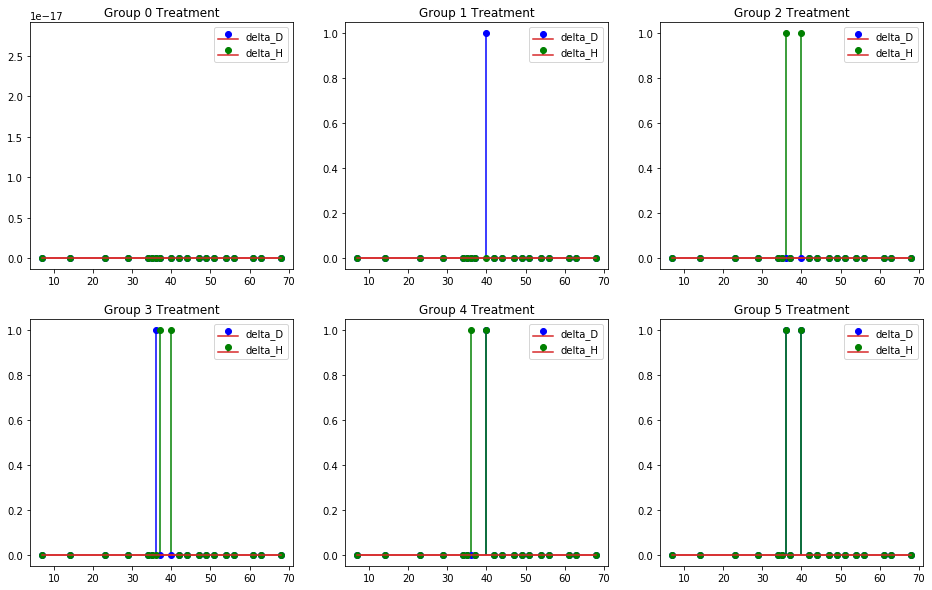

<Figure size 288x180 with 0 Axes>

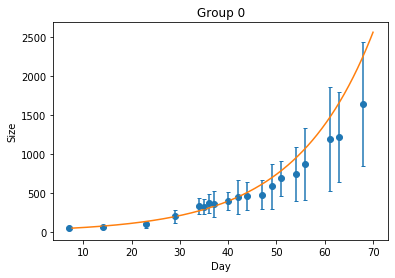

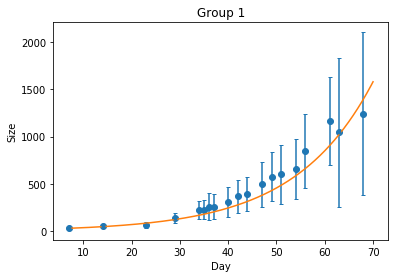

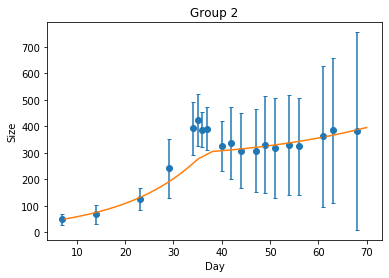

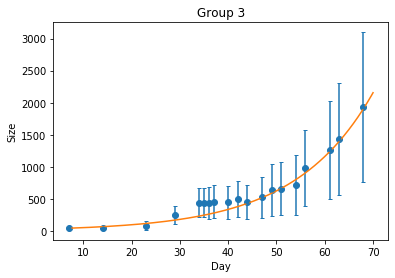

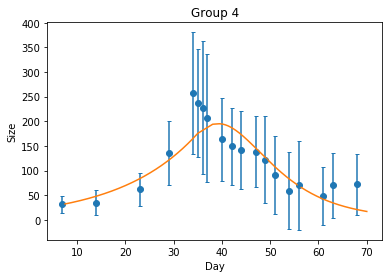

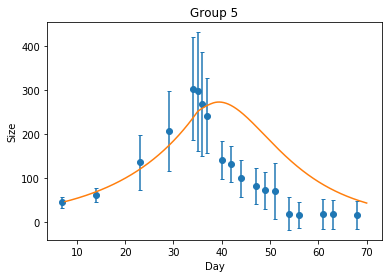

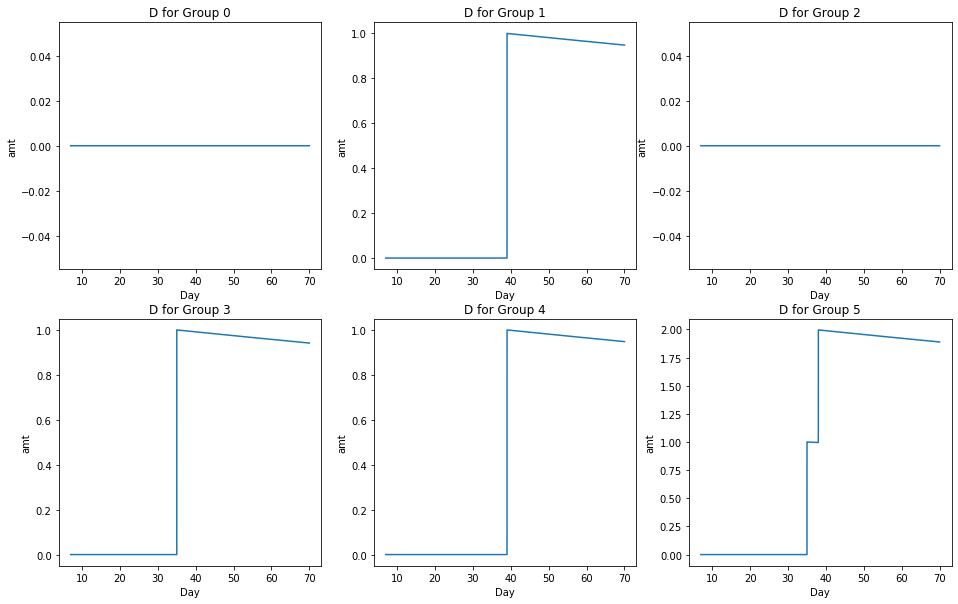

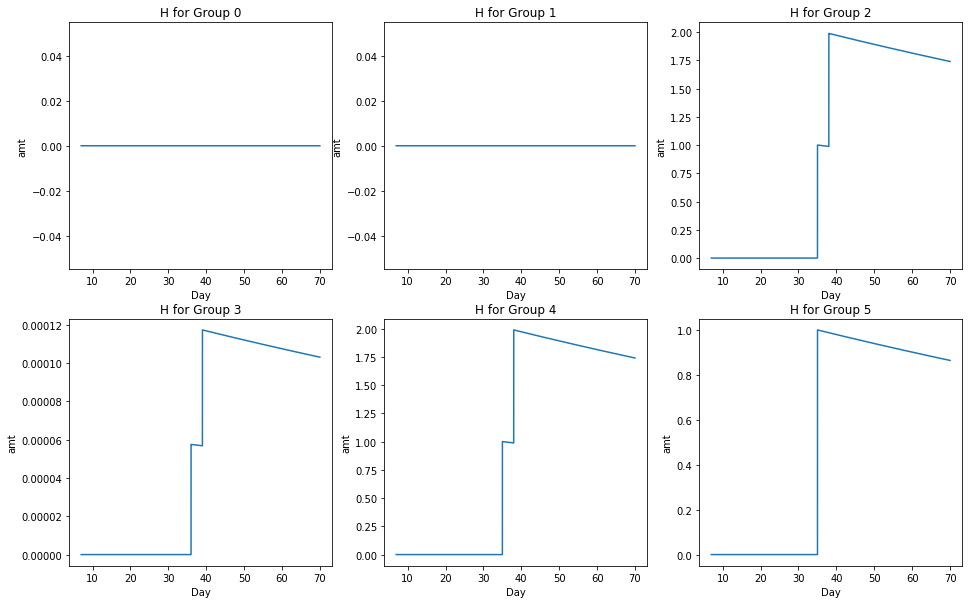

r = 0.0619
lambda_h = 0.0289
lambda_ho = 0.1
lambda_od = 0.0703
tau_o = 0.1
tau_d = 0.00172
tau_h = 0.00417
lambda_dh = 9.78


In [12]:
class growth_model_2(growth_model):
    def __init__(self):
        super().__init__(ts, np.array(Ts[:,0]).reshape(-1,))
        self.groups = [0,1,2,3,4,5]
        self._times = ts
        
        self.Sds_fit = get_Sd_impulse(ts)
        self.Shs_fit = get_Sh_impulse(ts)
        
        self.Sds_sim = get_Sd_impulse(sim_times)
        self.Shs_sim = get_Sh_impulse(sim_times)
        
        self.Sds = self.Sds_fit
        self.Shs = self.Shs_fit 
        
        
        plt.figure(figsize=[16,10])
        for ii in range(len(self.groups)):
            group = self.groups[ii]
            plt.subplot(2,3,ii+1)
            plt.stem(ts, self.Sds[ii,:], 'b', markerfmt='bo', label='delta_D', use_line_collection=True)
            plt.stem(ts, self.Shs[ii,:], 'g', markerfmt='go', label='delta_H', use_line_collection=True)
            plt.title('Group ' + str(group) + ' Treatment')
            plt.legend()
        plt.show()
         
    def _simulate(self, params, times):
        self.sim_T, self.sim_D, self.sim_H, self.sim_O = rungeKutta_all_params(times, \
                            self._T0, self.dTdt, self.dDdt, self.dHdt, self.dOdt, self.Sds, self.Shs, params)
        return self.sim_T
    
    def simulate(self, r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh, times=None):
        if times is None: times = self._times        
        return self._simulate([r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh], times)
    
    def dDdt(self, t, D, params, i):
        #r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh = [x for x in params]
        tau_D = params[5]
        return -tau_D*D
    
    def dHdt(self, t, H, D, params, i):
        #r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh = [x for x in params]
        tau_H = params[6]
        return -tau_H*H
    
    def dOdt(self, t, O, D, H, params, i):
        #r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh = [x for x in params]
        lambda_od = params[3]
        tau_o = params[4]
        return lambda_od * D - tau_o * O
    
    def dTdt(self, t, T, H, O, params, i):
        #r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh = [x for x in params]
        r = params[0]
        lambda_h = params[1]
        lambda_ho = params[2]
        return (r - lambda_h*H - lambda_ho*H*O)*T
    
    def backward(self):
        T_obs = Ts
        sigmas_obs = np.ones(T_obs.shape)
        with pm.Model() as model:
            self.param_list = ['r', 'lambda_h', 'lambda_ho', 'lambda_od', 'tau_o', 'tau_d', 'tau_h', 'lambda_dh']
            
            #r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh 

            r_lower = 0.0001
            r_upper = 0.1
        
            lambda_h_lower = 0.0001
            lambda_h_upper = 10
            
            lambda_ho_lower = 0.0001
            lambda_ho_upper = 10
            
            lambda_od_lower = 0.0001
            lambda_od_upper = 10
            
            tau_o_lower = 0.0001 
            tau_o_upper = 0.5
            
            tau_d_lower = 0.0001 
            tau_d_upper = 0.5
            
            tau_h_lower = 0.0001
            tau_h_upper = 0.3

            lambda_dh_lower = 0.0001
            lambda_dh_upper = 10
            
            r = pm.Uniform('r', lower=r_lower, upper=r_upper)
            lambda_h = pm.Uniform('lambda_h', lower=lambda_h_lower, upper=lambda_h_upper)
            lambda_ho = pm.Uniform('lambda_ho', lower=lambda_ho_lower, upper=lambda_ho_upper)
            lambda_od = pm.Uniform('lambda_od', lower=lambda_od_lower, upper=lambda_od_upper)
            tau_o = pm.Uniform('tau_o', lower= tau_o_lower, upper= tau_o_upper)
            tau_d = pm.Uniform('tau_d', lower= tau_d_lower, upper= tau_d_upper)
            tau_h = pm.Uniform('tau_h', lower= tau_h_lower, upper= tau_h_upper)
            lambda_dh = pm.Uniform('lambda_dh', lower=lambda_dh_lower, upper=lambda_dh_upper)
            
            ## Theano wrapper is necessary in order to pass the forward evolution to PyMC3
            @as_op(itypes=[tt.dscalar, tt.dscalar, tt.dscalar, tt.dscalar, tt.dscalar, tt.dscalar, tt.dscalar, tt.dscalar], otypes=[tt.dmatrix]) 
            def th_forward_model(r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh):
                th_states = self.simulate(r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh)
                return th_states
            
            forward = th_forward_model(r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh)
            
            T = pm.Normal('T', mu=forward, sigma = sigmas_obs, observed=T_obs)

            # Initial points for each of the chains
            np.random.seed(100)
            n_chains = 5
            startsmc=[{'r':np.random.uniform(r_lower, r_upper),
                       'lambda_h':np.random.uniform(lambda_h_lower, lambda_h_upper),
                       'lambda_ho':np.random.uniform(lambda_ho_lower, lambda_ho_upper),                      
                       'lambda_od':np.random.uniform(lambda_od_lower, lambda_od_upper),
                       'tau_o':np.random.uniform(tau_o_lower, tau_o_upper),
                       'tau_d':np.random.uniform(tau_d_lower, tau_d_upper),
                       'tau_h':np.random.uniform(tau_h_lower, tau_h_upper),
                       'lambda_dh':np.random.uniform(lambda_dh_lower, lambda_dh_upper)
                      } for _ in range(n_chains)]
            num_samples = 1000 # Within each chain, operations are sequential and cannot be parallelized.
            # if the number of samples drops too low, then the model will throw a negative minors in cholesky factorization
            num_tune = int(num_samples/5)
            #step = pm.SMC()
            
            step = pm.Metropolis()
            self.trace = pm.sample(num_samples, step=step, tune=num_tune, chains = n_chains, cores=1, start=startsmc)
            """
            self.trace = pm.sample_smc(2000)
            """
            
            pm.traceplot(self.trace)
            #print('log marginal likelihood: ' + str(np.log(model.marginal_likelihood)))
            #pm.compare(self.trace, ic='WAIC')
            #pm.dic(self.trace, model)
            pooled_waic = pm.waic(self.trace, model)
            print(pooled_waic)  
            model.name = 'model1'
            #pm.compare(self.trace)
            self.df_comp_WAIC = pm.compare({model: self.trace})
                    
    def plot_short(self, times, var, title):
        plt.figure()
        plt.plot(times.ravel(), var.ravel())
        plt.title(title)
        plt.show()
        
    def stem_short(self, times, var, title):
        plt.figure()
        plt.stem(times.ravel(), var.ravel())
        plt.title(title)
        plt.show()
                
    def graph_sims(self, sim_times, T_sim):
        plt.figure(figsize=[4,2.5])
        for ii in range(len(self.groups)):
            group = self.groups[ii]
            plt.figure()
            plt.scatter(ts, Ts[group,:])
            plt.errorbar(ts, Ts[group,:], sigmas[group,:],fmt='.', capsize=2)
            plt.plot(sim_times, T_sim[ii,:])
            plt.title('Group ' + str(group))
            plt.xlabel('Day')
            plt.ylabel('Size')
            plt.show()
            
        self.sim_D, self.sim_H, self.sim_O 
            
                
    def graph_Sds(self, times):
        plt.figure(figsize=[4,2.5])
        for ii in range(len(self.groups)):
            plt.figure()
            group = self.groups[ii]
            plt.stem(times, self.Sds[ii, :])
            plt.title('Group ' + str(group) + ' Sd')
            plt.xlabel('Day')
            plt.ylabel('Size')
            plt.show()
    
    def graph_Shs(self, times):
        plt.figure(figsize=[4,2.5])
        for ii in range(len(self.groups)):
            plt.figure()
            group = self.groups[ii]
            plt.stem(times, self.Shs[ii, :])
            plt.title('Group ' + str(group) + ' Sh')
            plt.xlabel('Day')
            plt.ylabel('Size')
            plt.show()
            
    def graph_D(self, sim_times):
        plt.figure(figsize=[16,10])
        for ii in range(len(self.groups)):
            group = self.groups[ii]
            plt.subplot(2,3,ii+1)
            plt.plot(sim_times, self.sim_D[ii,:])
            plt.title('D for Group ' + str(group))
            plt.xlabel('Day')
            plt.ylabel('amt')
        plt.show()
        
    def graph_H(self, sim_times):
        plt.figure(figsize=[16,10])
        for ii in range(len(self.groups)):
            group = self.groups[ii]
            plt.subplot(2,3,ii+1)
            plt.plot(sim_times, self.sim_H[ii,:])
            plt.title('H for Group ' + str(group))
            plt.xlabel('Day')
            plt.ylabel('amt')
        plt.show()
        
    def graph_O(self, sim_times):
        plt.figure(figsize=[16,10])
        for ii in range(len(self.groups)):
            group = self.groups[ii]
            plt.subplot(2,3,ii+1)
            plt.plot(sim_times, self.sim_O[ii,:])
            plt.title('O for Group ' + str(group))
            plt.xlabel('Day')
            plt.ylabel('amt')
        plt.show()
    
    
    def sim_graph_model():
        this_model = growth_model_2()
        this_model.Sds = this_model.Sds_sim
        this_model.Shs = this_model.Shs_sim
        
        #save0

        #dummy values
        r = 6.19e-2
        lambda_h = 2.89e-2
        lambda_ho = 1e-1
        lambda_od = 7.03e-2
        tau_o = 1e-1
        tau_d = 1.72e-3
        tau_h = 4.17e-3
        lambda_dh = 9.78
        
        T_sim = this_model.simulate(r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh, sim_times)
        
        this_model.graph_sims(sim_times, T_sim)
        this_model.graph_D(sim_times)
        this_model.graph_H(sim_times)
        this_model.graph_O(sim_times)
        
        print('r = ' + str(r))
        print('lambda_h = ' +str(lambda_h))
        print('lambda_ho = ' + str(lambda_ho))
        print('lambda_od = ' + str(lambda_od))
        print('tau_o = ' + str(tau_o))
        print('tau_d = ' + str(tau_d))
        print('tau_h = ' + str(tau_h)) 
        print('lambda_dh = ' + str(lambda_dh))
        
        return r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh
    
    
    def fit_sim_graph_model():
        this_model = growth_model_2()
        this_model.backward()
        this_model.Sds = this_model.Sds_sim
        this_model.Shs = this_model.Shs_sim
        r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh  = [this_model.get_param(x) for x in this_model.param_list]
        T_sim = this_model.simulate(r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh, sim_times)
        graph_sim(sim_times, T_sim)
        this_model.graph_D(sim_times)
        this_model.graph_H(sim_times)
        this_model.graph_O(sim_times)
        this_model.df_comp_WAIC
        
        print('r = ' + str(r))
        print('lambda_h = ' +str(lambda_h))
        print('lambda_ho = ' + str(lambda_ho))
        print('lambda_od = ' + str(lambda_od))
        print('tau_o = ' + str(tau_o))
        print('tau_d = ' + str(tau_d))
        print('tau_h = ' + str(tau_h)) 
        print('lambda_dh = ' + str(lambda_dh))
        
        return r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh
    
    
#r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh = growth_model_1.fit_sim_graph_model()
r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh = growth_model_2.sim_graph_model()
#r, lambda_O, lambda_OH, lambda_ODH, tau_O, lambda_HD, tau_H, tau_D = growth_model_4.sim_graph_model()


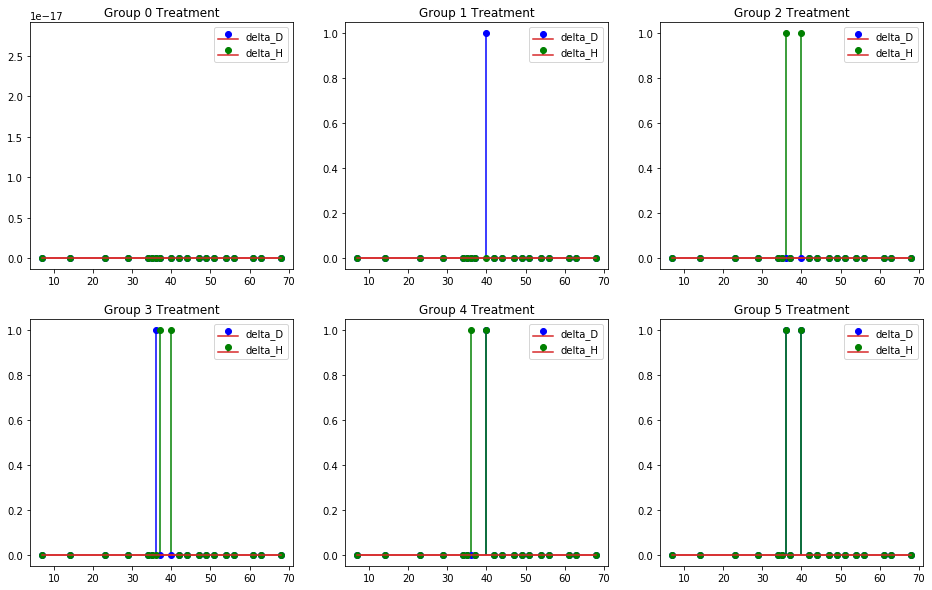

Sequential sampling (5 chains in 1 job)
CompoundStep
>Metropolis: [lambda_dh]
>Metropolis: [tau_h]
>Metropolis: [tau_d]
>Metropolis: [tau_o]
>Metropolis: [lambda_od]
>Metropolis: [lambda_ho]
>Metropolis: [lambda_h]
>Metropolis: [r]
Sampling chain 4, 0 divergences: 100%|█████████████████████████████████████████████| 1200/1200 [01:21<00:00, 14.76it/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\Reid\Anaconda3\lib\site-packages\arviz\stats\stats.py:1126: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


Computed from 5000 by 114 log-likelihood matrix

        Estimate       SE
IC_waic 154786990.65  56108525.42
p_waic  76912478.46        -

There has been a warning during the calculation. Please check the results.


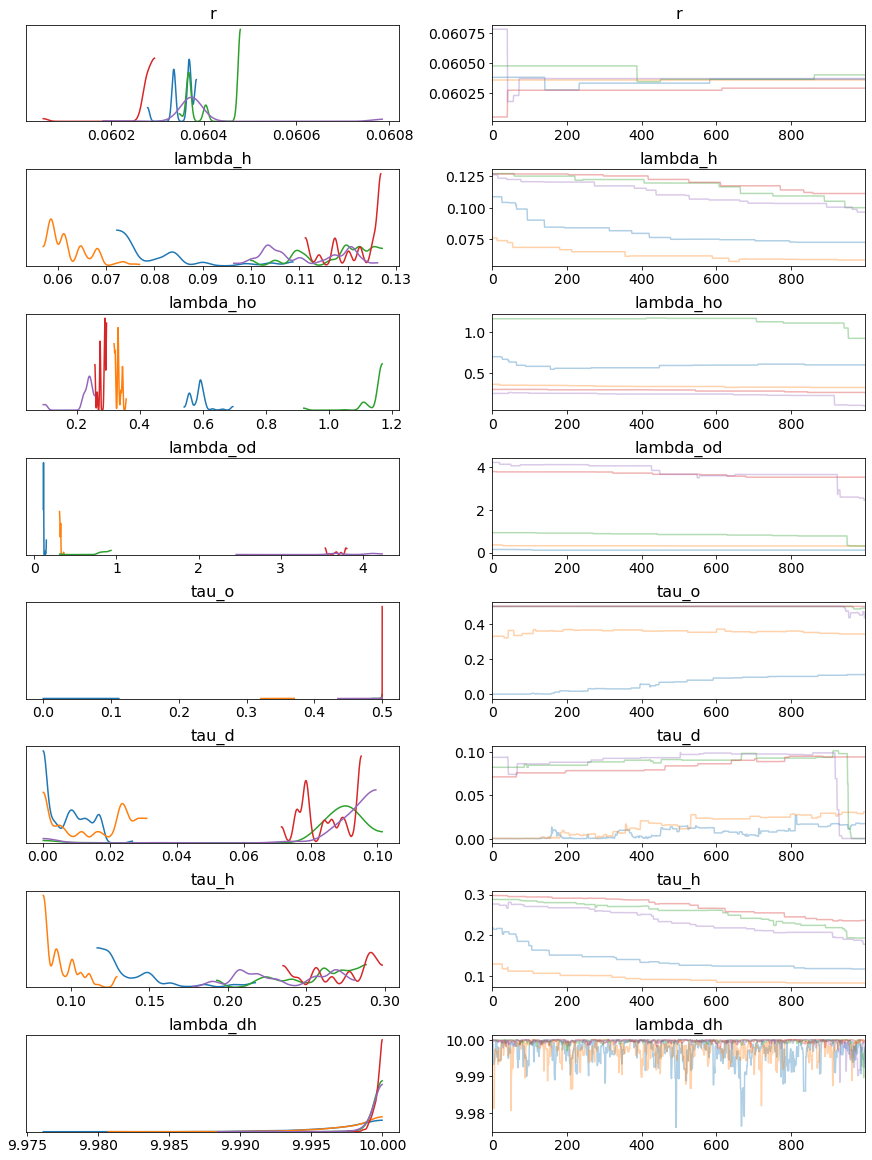

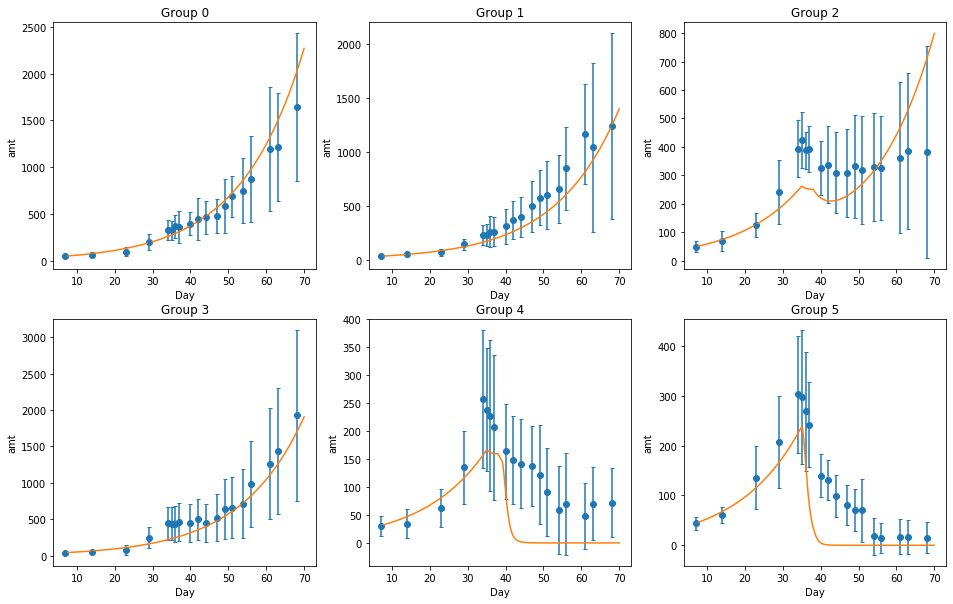

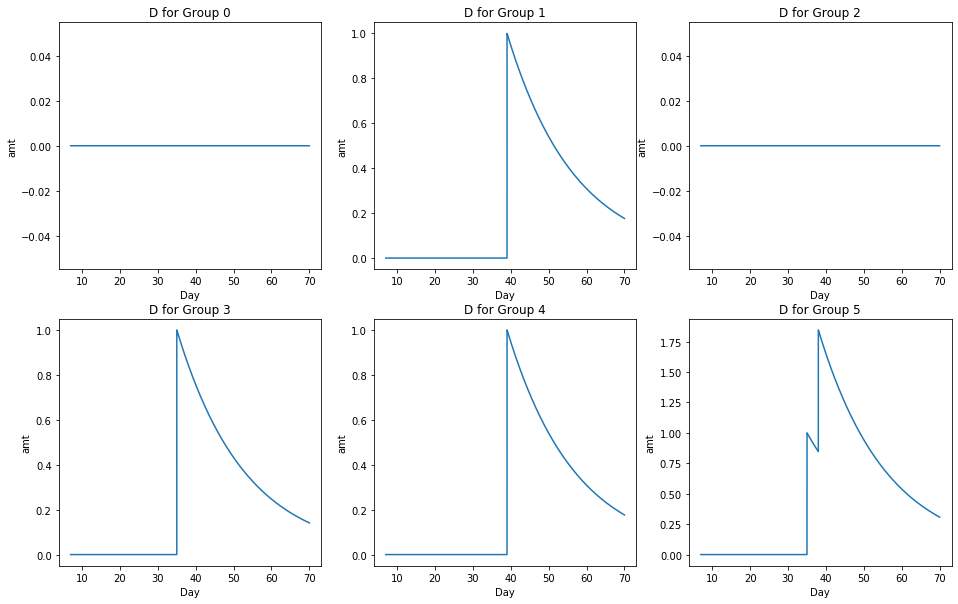

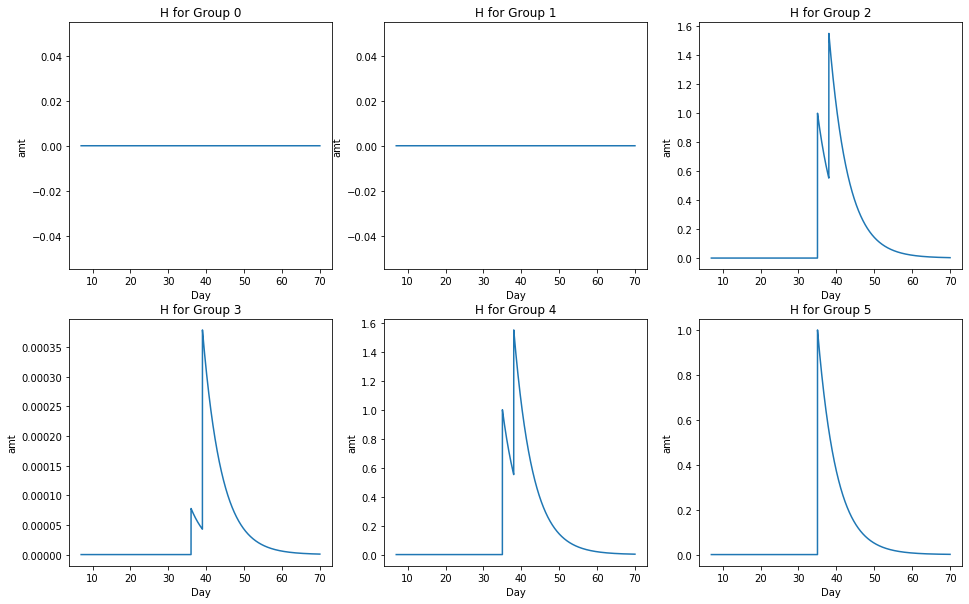

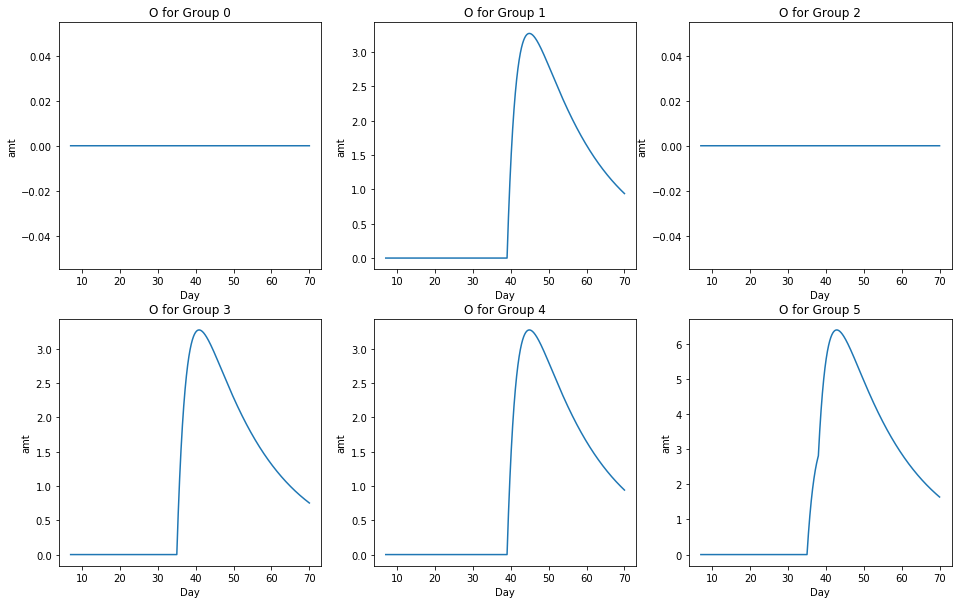

r = 0.06
lambda_h = 0.098
lambda_ho = 0.513
lambda_od = 1.742
tau_o = 0.383
tau_d = 0.056
tau_h = 0.199
lambda_dh = 9.999


ValueError: too many values to unpack (expected 7)

In [13]:
r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh = growth_model_2.fit_sim_graph_model()